In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('data.csv')
df.head()

,Ngày,Giá điều chỉnh,Giá đóng cửa,Thay đổi,Khối lượng khớp lệnh,Giá trị khớp lệnh,KL thoả thuận,GT thoả thuận,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,14/12/2023,32.0,32.0,0(0.00 %),15658600,504492000000,0,0,32.5,32.50,31.9
1,13/12/2023,32.0,32.0,-0.6(-1.84 %),21549400,700751000000,982000,32013200000,32.9,32.95,32.0
2,12/12/2023,32.6,32.6,-0.1(-0.31 %),12453800,406841000000,1500001,48975030450,32.8,33.00,32.5
3,11/12/2023,32.7,32.7,0.1(0.31 %),19996900,649302000000,25001,815030350,32.6,33.05,32.1
4,08/12/2023,32.6,32.6,-0.25(-0.76 %),18079900,591368000000,1,30600,32.7,33.00,32.3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ngày                  1737 non-null   object 
 1   Giá điều chỉnh        1737 non-null   float64
 2   Giá đóng cửa          1737 non-null   float64
 3   Thay đổi              1737 non-null   object 
 4   Khối lượng khớp lệnh  1737 non-null   int64  
 5   Giá trị khớp lệnh     1737 non-null   int64  
 6   KL thoả thuận         1737 non-null   int64  
 7   GT thoả thuận         1737 non-null   int64  
 8   Giá mở cửa            1737 non-null   float64
 9   Giá cao nhất          1737 non-null   float64
 10  Giá thấp nhất         1737 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 149.4+ KB


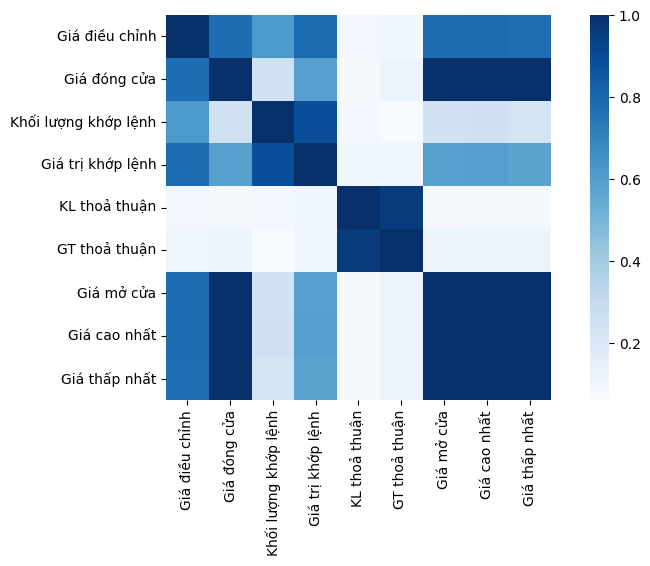

In [41]:
# Assuming 'Ngày' is the date column, you might want to exclude it from the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr(method="pearson")

# Create a subplot with a specified figure size
f, ax = plt.subplots(figsize=(10, 5))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap="Blues", square=True, ax=ax)

# Show the plot
plt.show()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

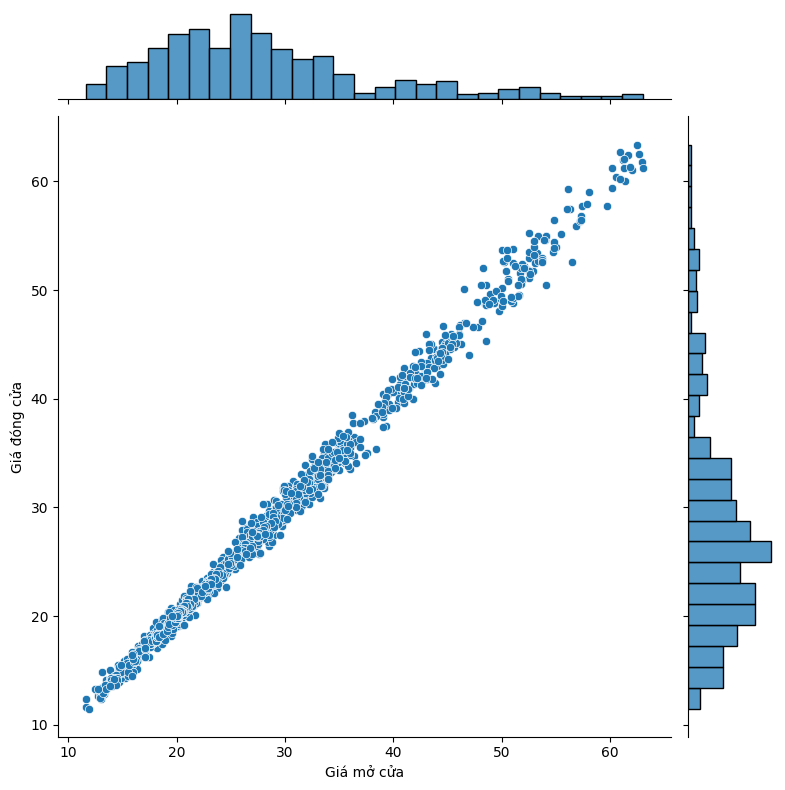

In [42]:
sns.jointplot(x = "Giá mở cửa", y = "Giá đóng cửa", data = df, height = 8, ratio = 6, kind = "scatter");

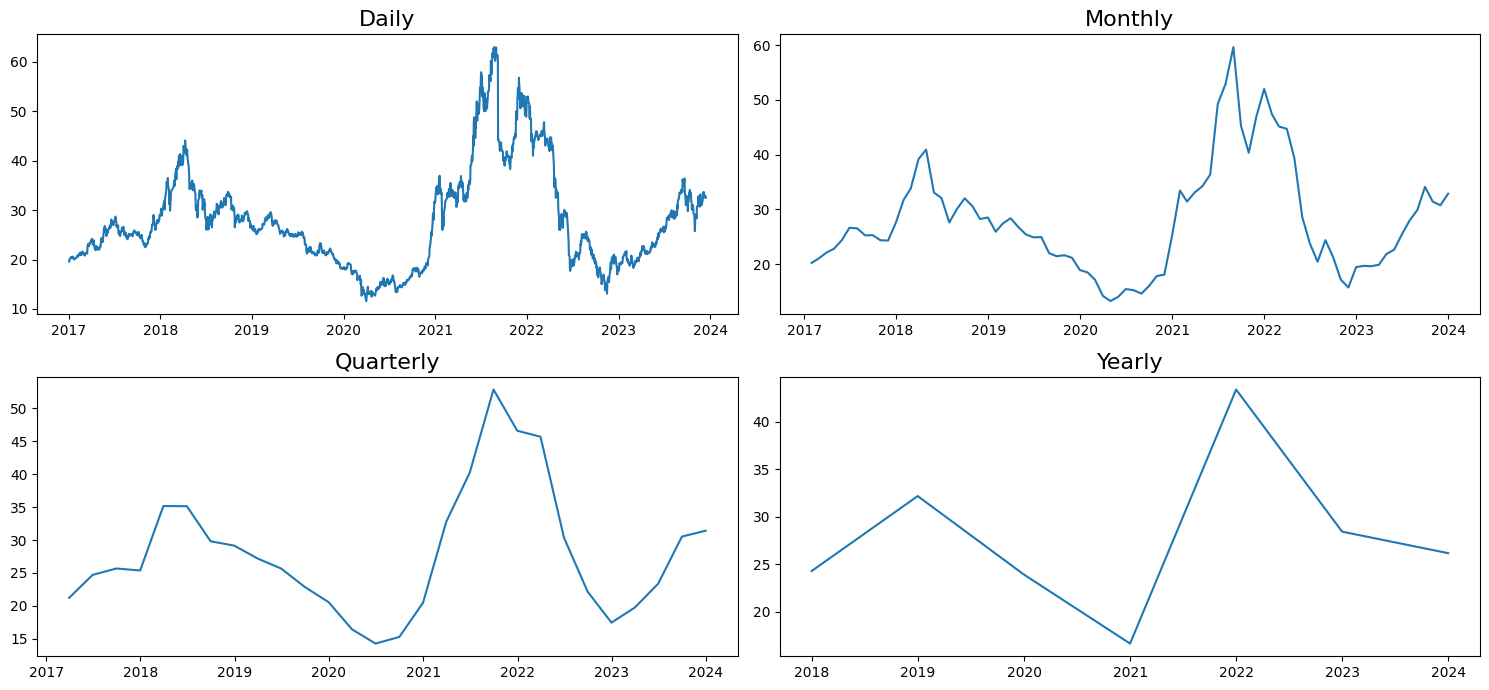

In [45]:
data=df.copy()

# Convert 'Ngày' column to datetime format
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')

# Set 'Ngày' column as the index
data.set_index('Ngày', inplace=True)

# Filter data for the targeted period
# data = data[data.index >= '2019-01-01']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=[15, 7])

# Resampling to daily frequency (original data)
axes[0, 0].plot(data['Giá mở cửa'])
axes[0, 0].set_title("Daily", size=16)

# Resampling to monthly frequency
axes[0, 1].plot(data['Giá mở cửa'].resample('M').mean())
axes[0, 1].set_title("Monthly", size=16)

# Resampling to quarterly frequency
axes[1, 0].plot(data['Giá mở cửa'].resample('Q').mean())
axes[1, 0].set_title('Quarterly', size=16)

# Resampling to yearly frequency
axes[1, 1].plot(data['Giá mở cửa'].resample('A').mean())
axes[1, 1].set_title('Yearly', size=16)

plt.tight_layout()
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ngày                  1737 non-null   object 
 1   Giá điều chỉnh        1737 non-null   float64
 2   Giá đóng cửa          1737 non-null   float64
 3   Thay đổi              1737 non-null   object 
 4   Khối lượng khớp lệnh  1737 non-null   int64  
 5   Giá trị khớp lệnh     1737 non-null   int64  
 6   KL thoả thuận         1737 non-null   int64  
 7   GT thoả thuận         1737 non-null   int64  
 8   Giá mở cửa            1737 non-null   float64
 9   Giá cao nhất          1737 non-null   float64
 10  Giá thấp nhất         1737 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 149.4+ KB
